In [1]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
! apt install cm-super
! sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
! sudo apt-get install texlive-fonts-extra

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

In [2]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

Setting rcParams['ps.usedistiller'] to 'xpdf' requires xpdf.


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
masterdata = pd.read_csv("/content/drive/MyDrive/GMCDE/experiments/power/CPowerST/2021-12-11-11-20_CPowerST_scala/CPowerST_scala.csv")

In [ ]:
masterdata.head(10)

,genId,type,dim,noise,obs_num,slice_technique,avg_c,std_c,power90,power95,power99
0,linear-l-2-0.3-gaussian-0,sy,2,0.30,100,c,0.782088,9.295950e-02,0.914,0.858,0.484
1,linear-l-2-0.13-gaussian-0,sy,2,0.13,100,c,0.989988,1.085344e-02,1.000,1.000,1.000
2,linear-l-2-0.33-gaussian-0,sy,2,0.33,100,c,0.746329,1.067642e-01,0.846,0.736,0.342
3,linear-l-2-0.53-gaussian-0,sy,2,0.53,100,c,0.554312,1.508588e-01,0.300,0.192,0.042
4,linear-l-2-0.0-gaussian-0,sy,2,0.00,100,c,1.000000,1.685780e-07,1.000,1.000,1.000
5,linear-l-2-0.27-gaussian-0,sy,2,0.27,100,c,0.820473,8.065764e-02,0.972,0.950,0.646
6,linear-l-2-0.17-gaussian-0,sy,2,0.17,100,c,0.957682,3.374059e-02,1.000,1.000,1.000
7,linear-l-2-0.6-gaussian-0,sy,2,0.60,100,c,0.512410,1.518783e-01,0.198,0.140,0.020
8,linear-l-2-0.93-gaussian-0,sy,2,0.93,100,c,0.468851,1.483710e-01,0.134,0.072,0.010
9,linear-l-2-0.1-gaussian-0,sy,2,0.10,100,c,0.998230,2.209186e-03,1.000,1.000,1.000


In [ ]:
masterdata["genId"] = [x.split("-")[1] for x in masterdata["genId"]]

In [ ]:
masterdata.head(10)

,genId,type,dim,noise,obs_num,slice_technique,avg_c,std_c,power90,power95,power99
0,l,sy,2,0.30,100,c,0.782088,9.295950e-02,0.914,0.858,0.484
1,l,sy,2,0.13,100,c,0.989988,1.085344e-02,1.000,1.000,1.000
2,l,sy,2,0.33,100,c,0.746329,1.067642e-01,0.846,0.736,0.342
3,l,sy,2,0.53,100,c,0.554312,1.508588e-01,0.300,0.192,0.042
4,l,sy,2,0.00,100,c,1.000000,1.685780e-07,1.000,1.000,1.000
5,l,sy,2,0.27,100,c,0.820473,8.065764e-02,0.972,0.950,0.646
6,l,sy,2,0.17,100,c,0.957682,3.374059e-02,1.000,1.000,1.000
7,l,sy,2,0.60,100,c,0.512410,1.518783e-01,0.198,0.140,0.020
8,l,sy,2,0.93,100,c,0.468851,1.483710e-01,0.134,0.072,0.010
9,l,sy,2,0.10,100,c,0.998230,2.209186e-03,1.000,1.000,1.000


In [ ]:
masterdata["genId"].unique()

array(['l', 'hcg', 'dl_0.25', 'hs', 'lp_2.0', 'cr', 'si_1.0', 'st',
       'si_5.0', 'ho', 'hc', 'zi'], dtype=object)

In [ ]:
masterdata["dim"].unique()

array([ 2,  4,  8, 12, 16])

In [ ]:
masterdata["slice_technique"].unique()

array(['c', 'su', 'u'], dtype=object)

In [ ]:
genIds = ['l','dl_0.25','lp_2.0','si_1.0', 'si_5.0','hc','hcg','hs','cr','st','ho','zi']
#genIds = ['l','dl_0.25','lp_2.0','si_1.0', 'si_5.0','hc','hcg','hs','cr','st','ho','zi', 'i']

In [ ]:
prettynames = {
    'si_5.0': "S5", 
    'si_1.0': "S1", 
    'hs': "Hs", 
    'st': "St", 
    'dl_0.25': "Dl", 
    'zi': "Zi", 
    'i': "I", 
    'hcg': "HcG", 
    'hc': "Hc", 
    'ho': "H", 
    'cr': "C",
    "l" : "L",
    "lp_2.0":"Lp"
}

In [ ]:
master_100_sy = masterdata[(masterdata["obs_num"] == 100) & (masterdata["type"] == "sy")]
master_100_asy = masterdata[(masterdata["obs_num"] == 100) & (masterdata["type"] == "asy")]
master_1000_sy = masterdata[(masterdata["obs_num"] == 1000) & (masterdata["type"] == "sy")]
master_1000_asy = masterdata[(masterdata["obs_num"] == 1000) & (masterdata["type"] == "asy")]

In [ ]:
def score_plot(selectedData, nDim, obs_num, symmetric_true_or_false):
  vars = ["c", "su", "u"]
  var_name = "slice_technique"
  avg = "avg_c"
  std = "std_c"

  num_vars = len(vars)
  num_genIds = len(genIds)
  fig, axes = plt.subplots(nrows=2, ncols=num_vars, figsize=(7*num_vars, 8), sharey=False, sharex=True)
  axess = axes.reshape(-1)
  data_type = "Symmetric" if symmetric_true_or_false else "Asymmetric"
  fig.suptitle(f"Distribution of Dependency Measure scores, {nDim} Dimensions, {obs_num} observations, {data_type} data", fontsize = 30, y = 1.1)

  for i,var in enumerate(vars):
      subdata = selectedData[(selectedData[var_name] == var)  & (selectedData["dim"] == nDim)]
      d = subdata.groupby(["noise","genId"]).mean()[avg].reset_index()
      dd = d.set_index(["noise", "genId"]).unstack("noise")
      dd.columns = dd.columns.droplevel(0)
      dd = dd.reindex(genIds)
      dd = dd.rename(index={genId: prettynames[genId] for genId in genIds})

      
      ax = axess[i]

      sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100), vmax=dd.max().max(),
                      xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], 
                      ax=ax)

      ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
      
      ax.set_title(r'%s'%(var))
      ax.set_ylabel("")
      
      sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
      ax.set_xticklabels(["0"] + sp + ["0.2"] + sp + ["0.4"] + sp + ["0.6"] + sp + ["0.8"] + sp + ["1"])
      
      ax.set_xlabel("")
      if(i==0):
          ax.set_ylabel("avg")
      else:
          ax.set_ylabel("")

  for i,var in enumerate(vars):
      subdata = selectedData[(selectedData[var_name] == var)  & (selectedData["dim"] == nDim)]
      d = subdata.groupby(["noise","genId"]).mean()[std].reset_index()
      dd = d.set_index(["noise", "genId"]).unstack("noise")
      dd.columns = dd.columns.droplevel(0)
      dd = dd.reindex(genIds)
      dd = dd.rename(index={genId: prettynames[genId] for genId in genIds})
      
      ax = axess[i+num_vars]
      
     
      sns.heatmap(dd,  cmap=sns.color_palette("RdBu", 100),
              xticklabels=[format(x, '.2f') for x in dd.columns.values.round(2)], ax=ax)
      
      ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
      
      ax.set_title("")
      ax.set_ylabel("")
      labels = ["" for x in range(0,31)]
      labels[0] = "0"
      labels[-1] = "1"
      labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
      ax.set_xticklabels(labels, rotation = 0)
      ax.set_xlabel('')
      
      if(i==0):
          ax.set_ylabel("std")
      else:
          ax.set_ylabel("")
      
  plt.tight_layout()

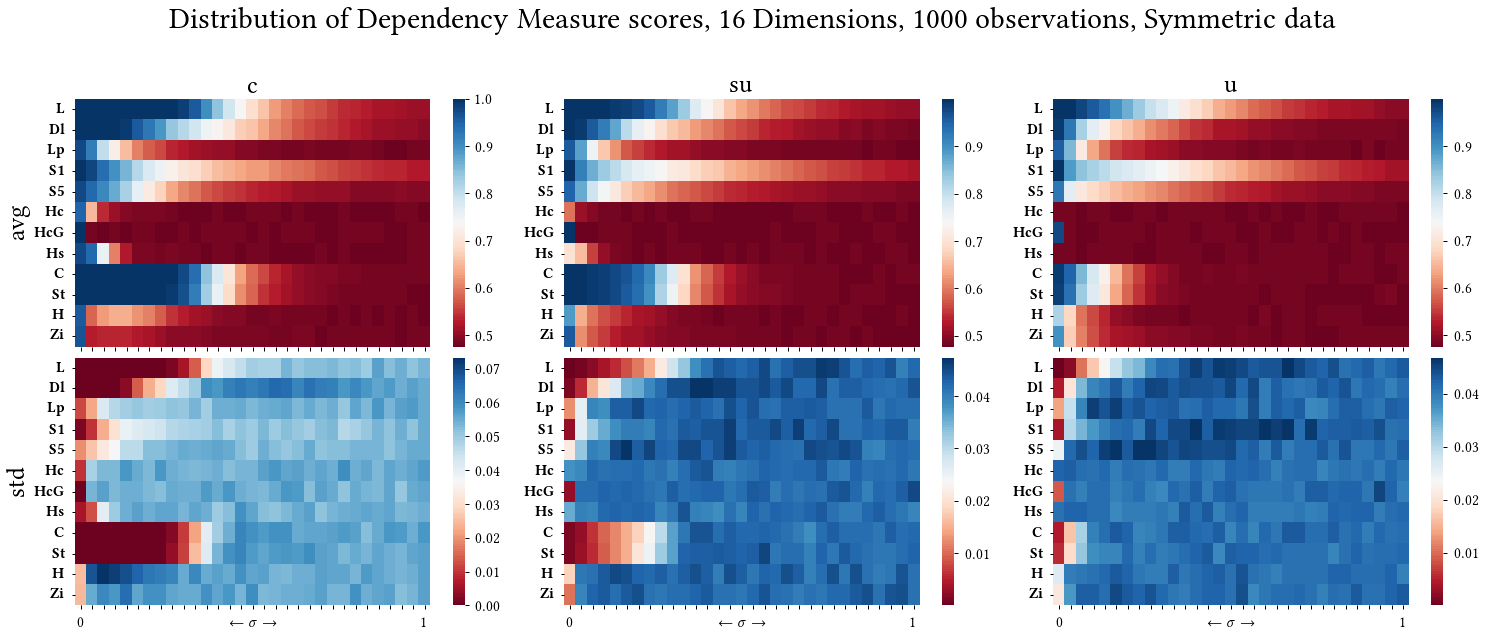

In [ ]:
score_plot(master_1000_sy, 16, 1000, True)

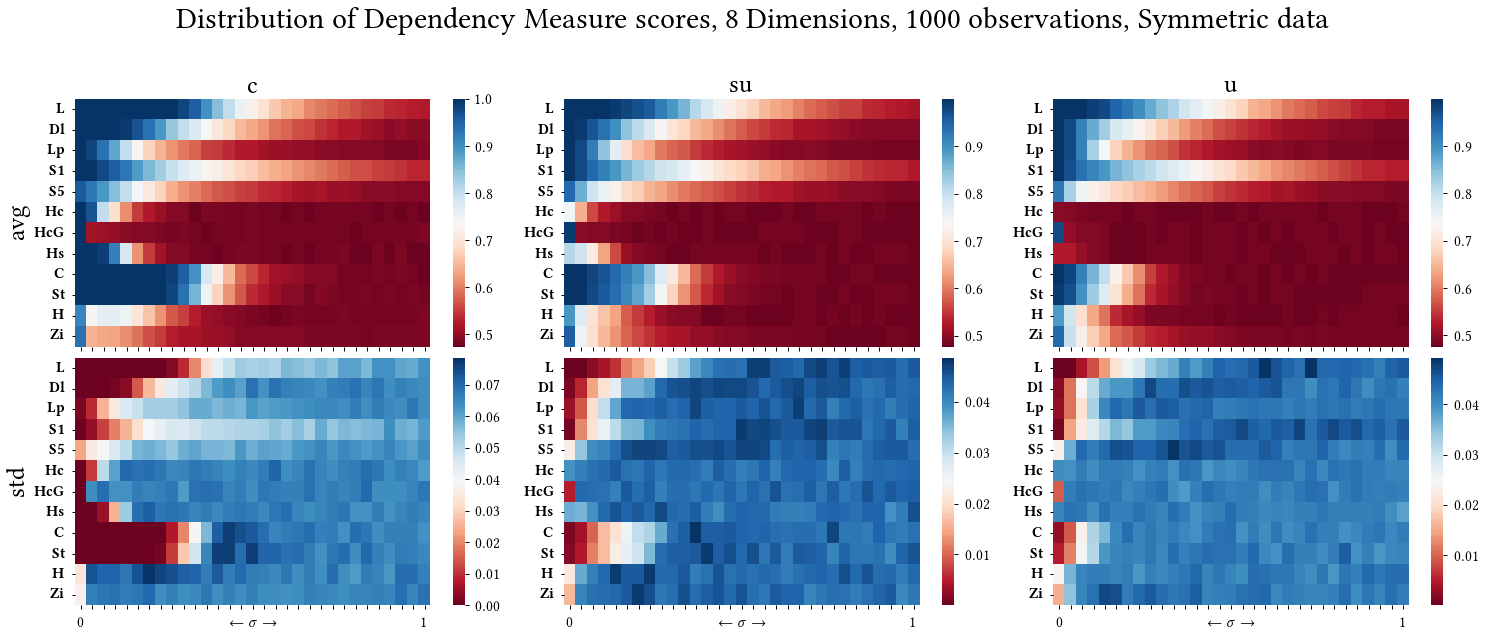

In [ ]:
score_plot(master_1000_sy, 8, 1000, True)

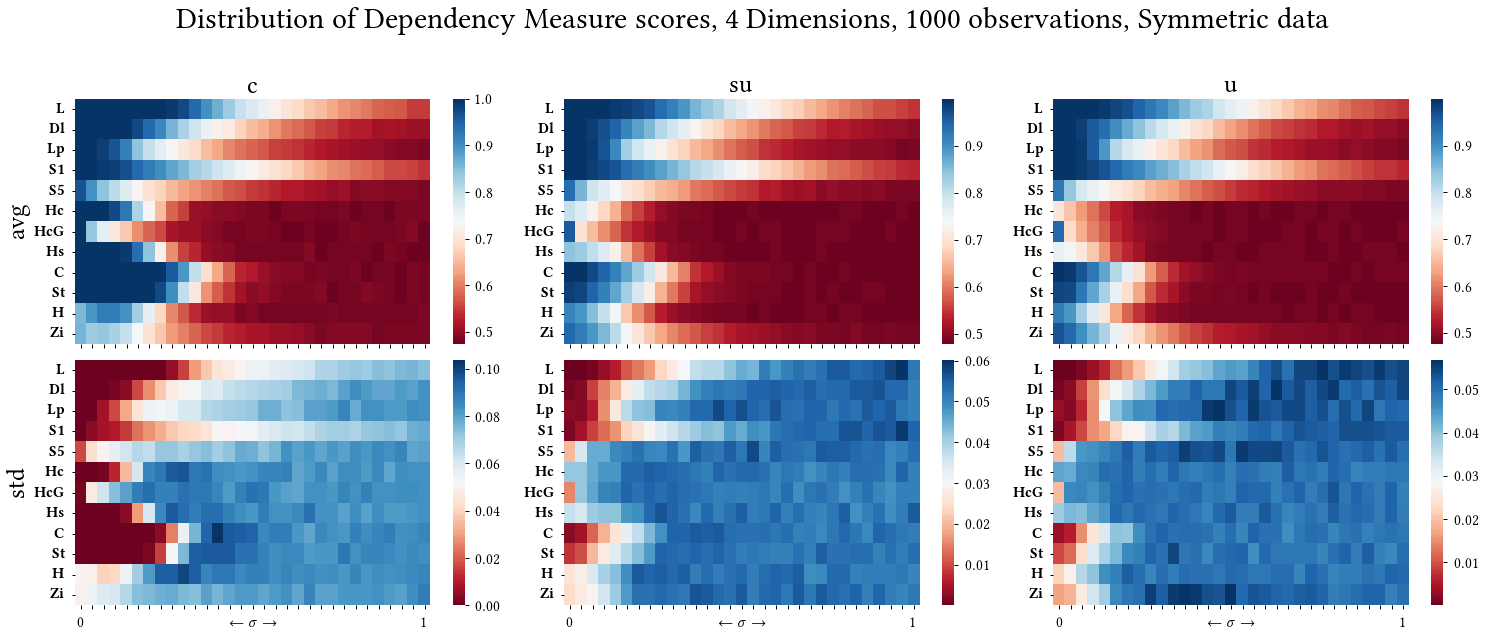

In [ ]:
score_plot(master_1000_sy, 4, 1000, True)

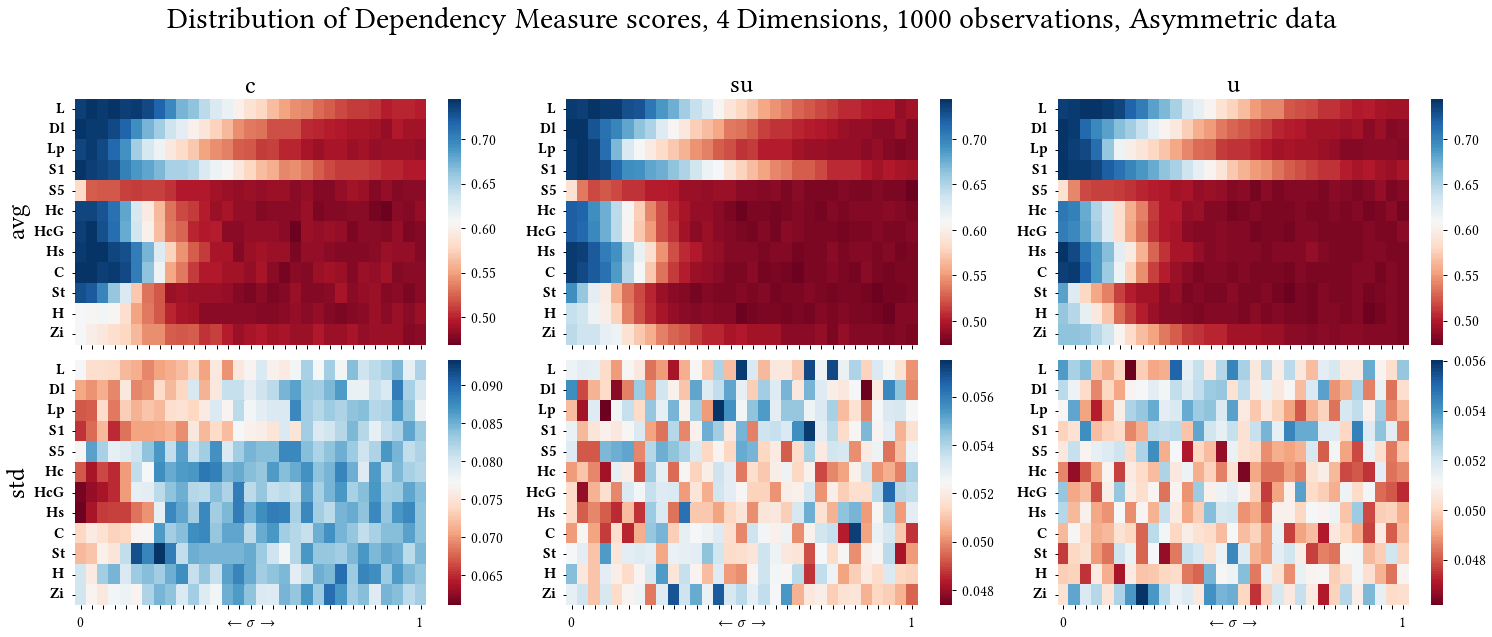

In [ ]:
score_plot(master_1000_asy, 4, 1000, False)

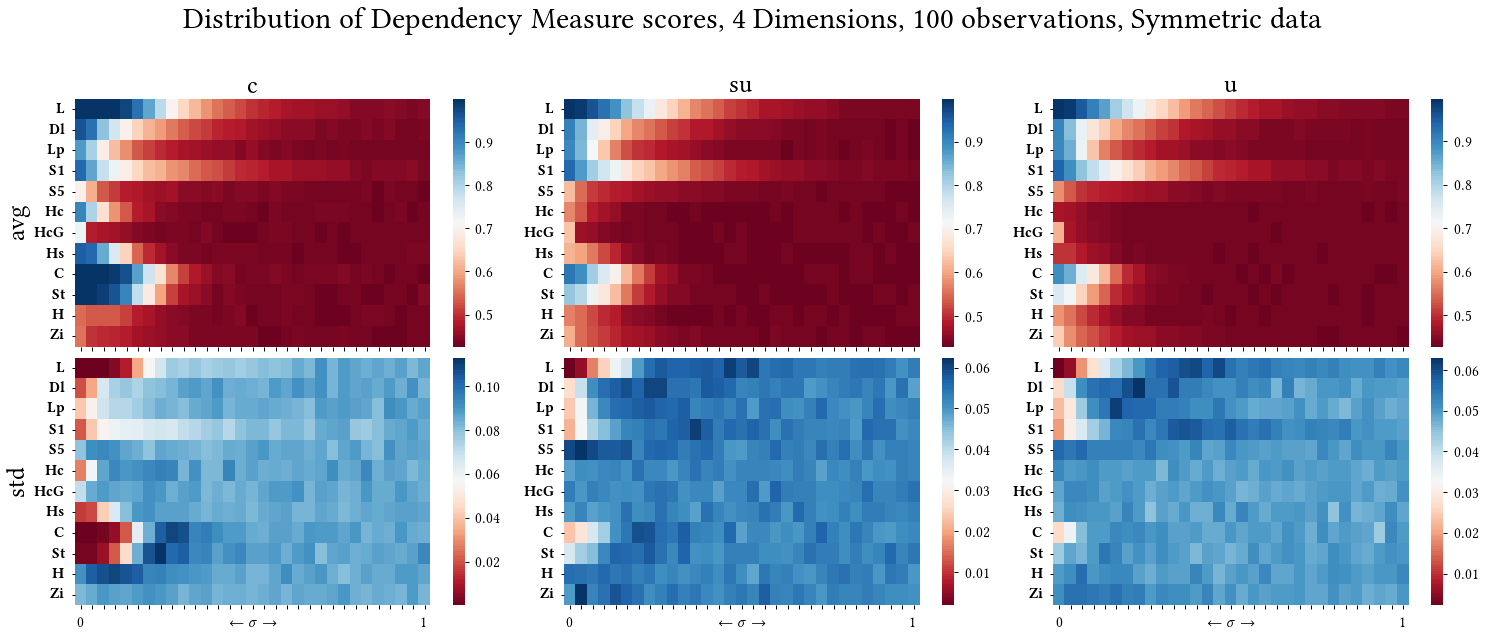

In [ ]:
score_plot(master_100_sy, 4, 100, True)

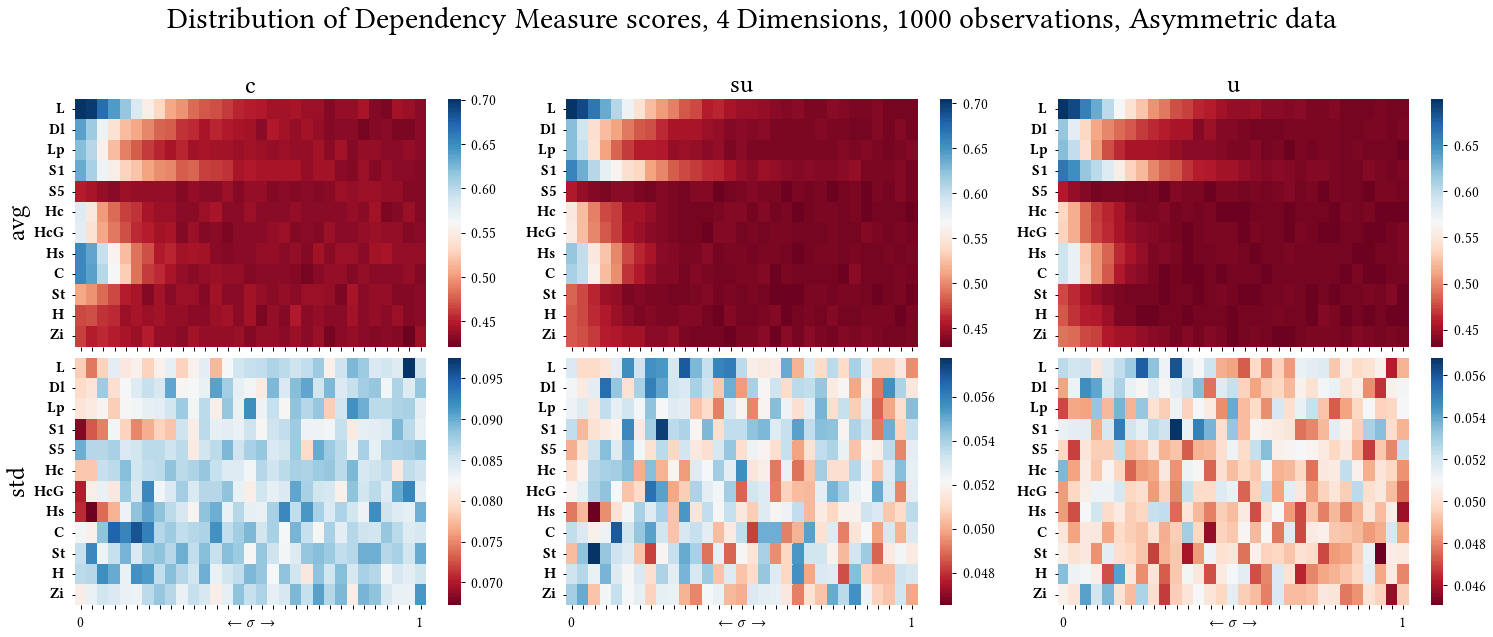

In [ ]:
score_plot(master_100_asy, 4, 1000, False)

In [ ]:
def power_plot(masterdata, variable, powerk, suptitle):
  %matplotlib inline

  vars = masterdata[variable].unique()
  num_vars = len(vars)
  num_genIds = len(genIds)

  fig, axes = plt.subplots(nrows=num_genIds, ncols=num_vars, figsize=(7*num_vars, 2.5*num_genIds), sharey=True, sharex=True)
  axess = axes.reshape(-1)
  fig.suptitle(suptitle, fontsize = 25 ,y=0.9)
  cbar_ax1 = fig.add_axes([.95, 0.14, .01, 0.72])


  i = 0
  for genId in genIds:
      measure = powerk

      for var in vars:
          ax = axess[i]
          subdata = masterdata[(masterdata[variable] == var) & (masterdata["genId"] == genId)]
          d = subdata.groupby(["noise","dim"]).mean()[measure].reset_index()
          dd = d.set_index(["noise", "dim"]).unstack("noise")
          dd.columns = dd.columns.droplevel(0)

          plt.sca(axess[i])
          
          sns.heatmap(dd, vmin=0.0, vmax=1.0, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                          xticklabels=3,
                          cbar=True,
                      cbar_ax=cbar_ax1)
          
          if(i < len(vars)):
              plt.title(var)
          
          if((i % len(vars)) == 0):
              plt.ylabel(prettynames[genId],  rotation=0, labelpad=20)
              ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
          else:
              plt.ylabel("")
              
          labels = ["" for x in range(0,11)]
          labels[0] = "0"
          labels[-1] = "1"
          labels[5] = r"$\sigma$"
          labels[3] = r"$\leftarrow$"
          labels[7] = r"$\rightarrow$"
          
          ax.set_xticklabels(labels,  rotation=0)
          
          ax.set_xlabel('', labelpad=0)
          i = i+1



In [ ]:
def power95_compare(masterdata, benchmark,to_compares, variable, suptitle):
  %matplotlib inline

  num_to_compare = len(to_compares)
  num_genIds = len(genIds)

  fig, axes = plt.subplots(nrows=num_genIds, ncols=num_to_compare, figsize=(7*num_to_compare, 2.5*num_genIds), sharey=True, sharex=True)
  axess = axes.reshape(-1)
  fig.suptitle(f"Power95, {benchmark} - others" + "\n" + suptitle, fontsize = 25 ,y=1.0)
  cbar_ax1 = fig.add_axes([.95, 0.14, .01, 0.72])

  mask_threshold = 0.5

  i = 0
  for genId in genIds:
      measure = "power95"

      for to_compare in to_compares:
        ax = axess[i]
        ### bad estimator subdata
        subdata_bad = masterdata[(masterdata[variable] == to_compare) & (masterdata["genId"] == genId)]

        # the mask to the bad estimator
        d_bad_mask = subdata_bad.groupby(["noise","dim"]).mean()[measure].reset_index()
        d_bad_mask.loc[(d_bad_mask.power95 <= mask_threshold),measure] = 0.0
        d_bad_mask.loc[(d_bad_mask.power95 != 0.0),measure] = 1.0
        
        # the power of the bad estimator
        d_bad = subdata_bad.groupby(["noise","dim"]).mean()[measure].reset_index()
        # dd_bad = d_bad.set_index(["noise", "dim"]).unstack("noise")

        ### good estimator subdata
        subdata_good = masterdata[(masterdata[variable] == benchmark) & (masterdata["genId"] == genId)]

        # the mask of the good estimator
        d_good_mask = subdata_good.groupby(["noise","dim"]).mean()[measure].reset_index()
        d_good_mask.loc[(d_good_mask.power95 <= mask_threshold),measure] = 0.0
        d_good_mask.loc[(d_good_mask.power95 != 0.0),measure] = 1.0
        
        # the power of the bad estimator
        d_good = subdata_good.groupby(["noise","dim"]).mean()[measure].reset_index()
        # dd_good = d_good.set_index(["noise", "dim"]).unstack("noise")

        ### the power of the good/estimator/bad estimator
        d_quotient = d_good.copy()
        # d_quotient["power"] = d_good["power"] / d_bad["power"]
        # d_quotient.loc[(d_quotient.power >= 1), "power"] = 1
        # d_quotient.loc[(d_quotient.power < 1), "power"] = -1
        d_quotient[measure] = d_good[measure] - d_bad[measure]
        dd_quotient = d_quotient.set_index(["noise", "dim"]).unstack("noise")

        ### the combined mask
        d_mask = d_good_mask.copy()
        d_mask[measure] = d_good_mask[measure] + d_bad_mask[measure]
        d_mask.loc[(d_mask.power95 > 0), measure] = 2 #to avoid conflict with True == 1, False == 0
        d_mask.loc[(d_mask.power95 == 0), measure] = -2
        d_mask.loc[(d_mask.power95 == 2), measure] = False
        d_mask.loc[(d_mask.power95 == -2), measure] = True
        dd_mask = d_mask.set_index(["noise", "dim"]).unstack("noise").to_numpy()

        ### the final power
        # 1 -> good >= bad
        # -1 -> good <= bad
        # 0 -> ignored by mask because for both estimators power <= 0.5
        # dd = dd_quotient * dd_mask
        # dd.columns = dd.columns.droplevel(0)
        dd = dd_quotient

        plt.sca(axess[i])

        sns.heatmap(dd, vmin=-0.1, vmax=0.1, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                    xticklabels=3,
                    cbar=True,
                    cbar_ax=cbar_ax1, mask = dd_mask)


        if(i < num_to_compare):
              plt.title(to_compare)
          
        if((i % num_to_compare) == 0):
            plt.ylabel(prettynames[genId],  rotation=0, labelpad=20)
            ax.set_yticklabels(ax.get_yticklabels(),  rotation=0)
        else:
            plt.ylabel("")
                
        labels = ["" for x in range(0,11)]
        labels[0] = "0"
        labels[-1] = "1"
        labels[5] = r"$\sigma$"
        labels[3] = r"$\leftarrow$"
        labels[7] = r"$\rightarrow$"
            
        ax.set_xticklabels(labels,  rotation=0)
            
        ax.set_xlabel('', labelpad=0)
        i = i+1    

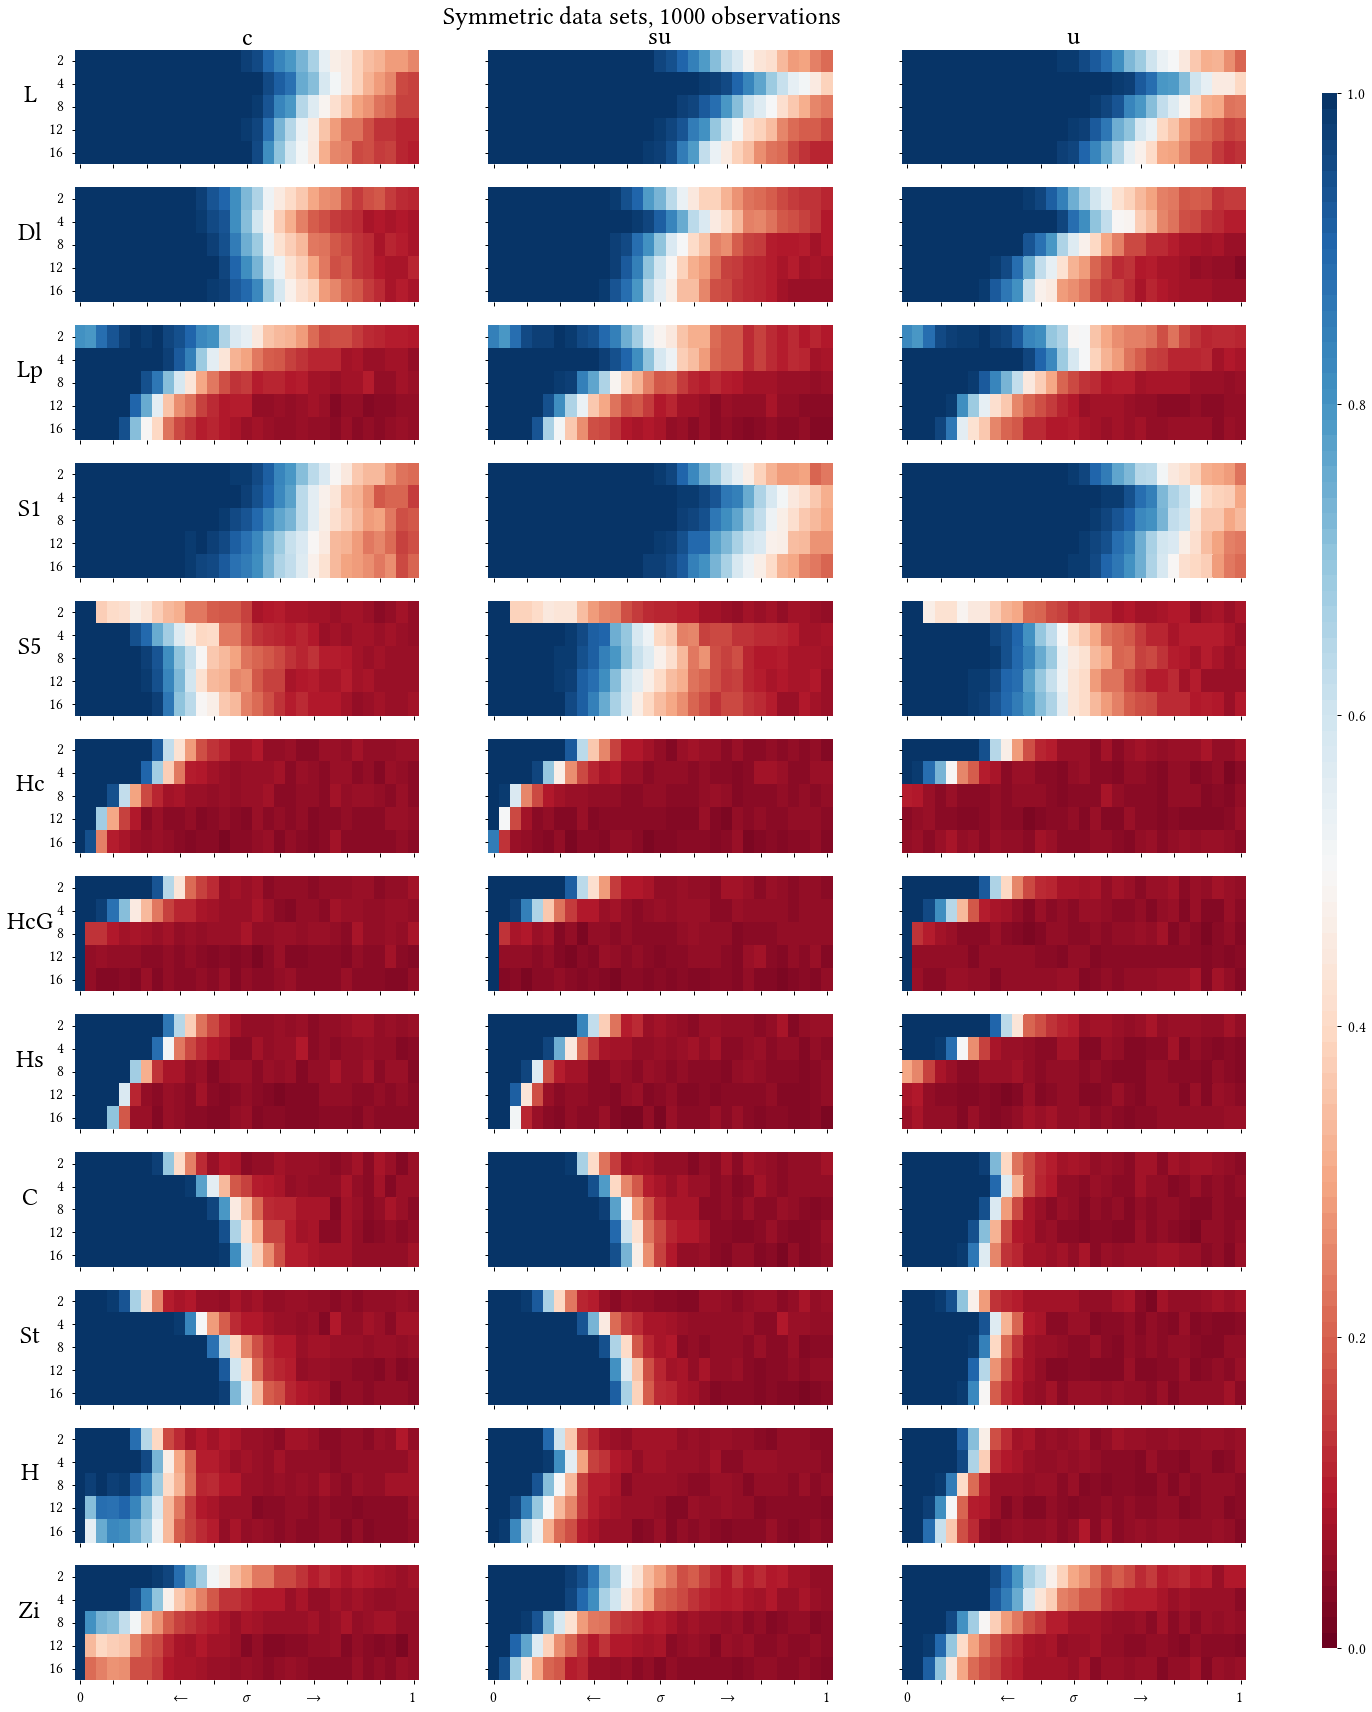

In [ ]:
power_plot(master_1000_sy, "slice_technique", "power95", "Symmetric data sets, 1000 observations")

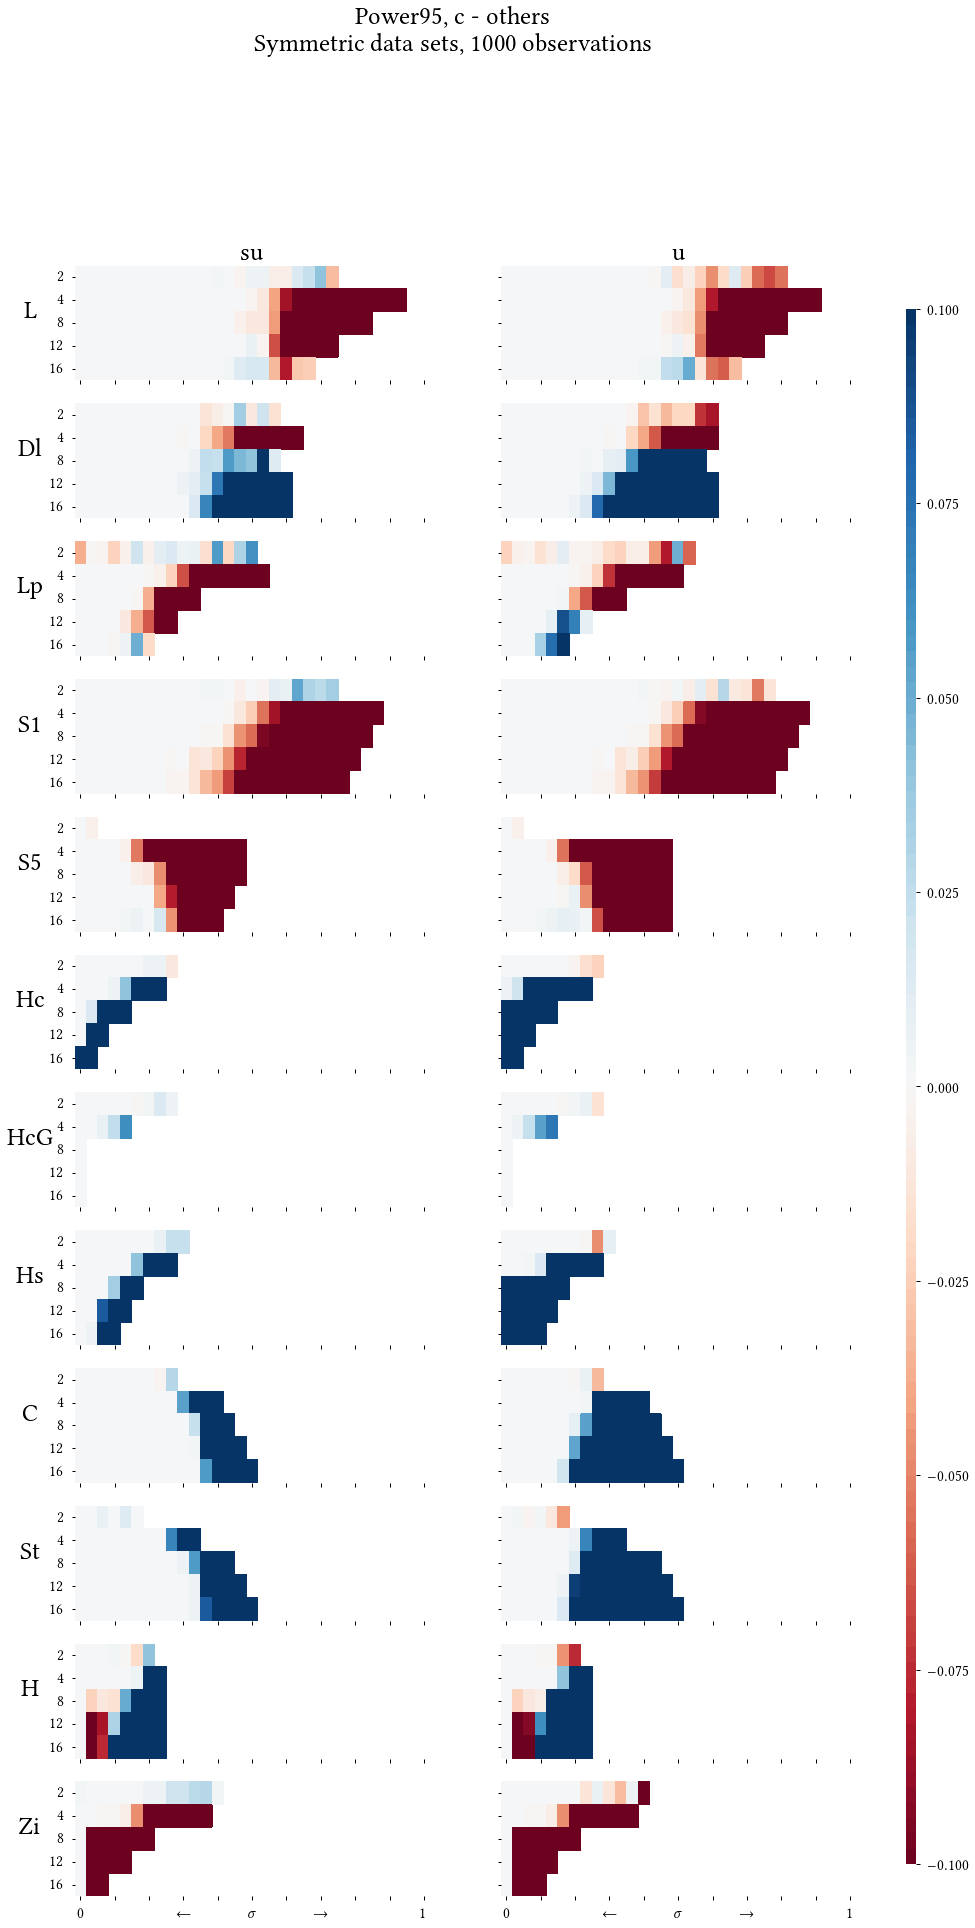

In [ ]:
power95_compare(master_1000_sy, "c", ["su", "u"], "slice_technique", "Symmetric data sets, 1000 observations")

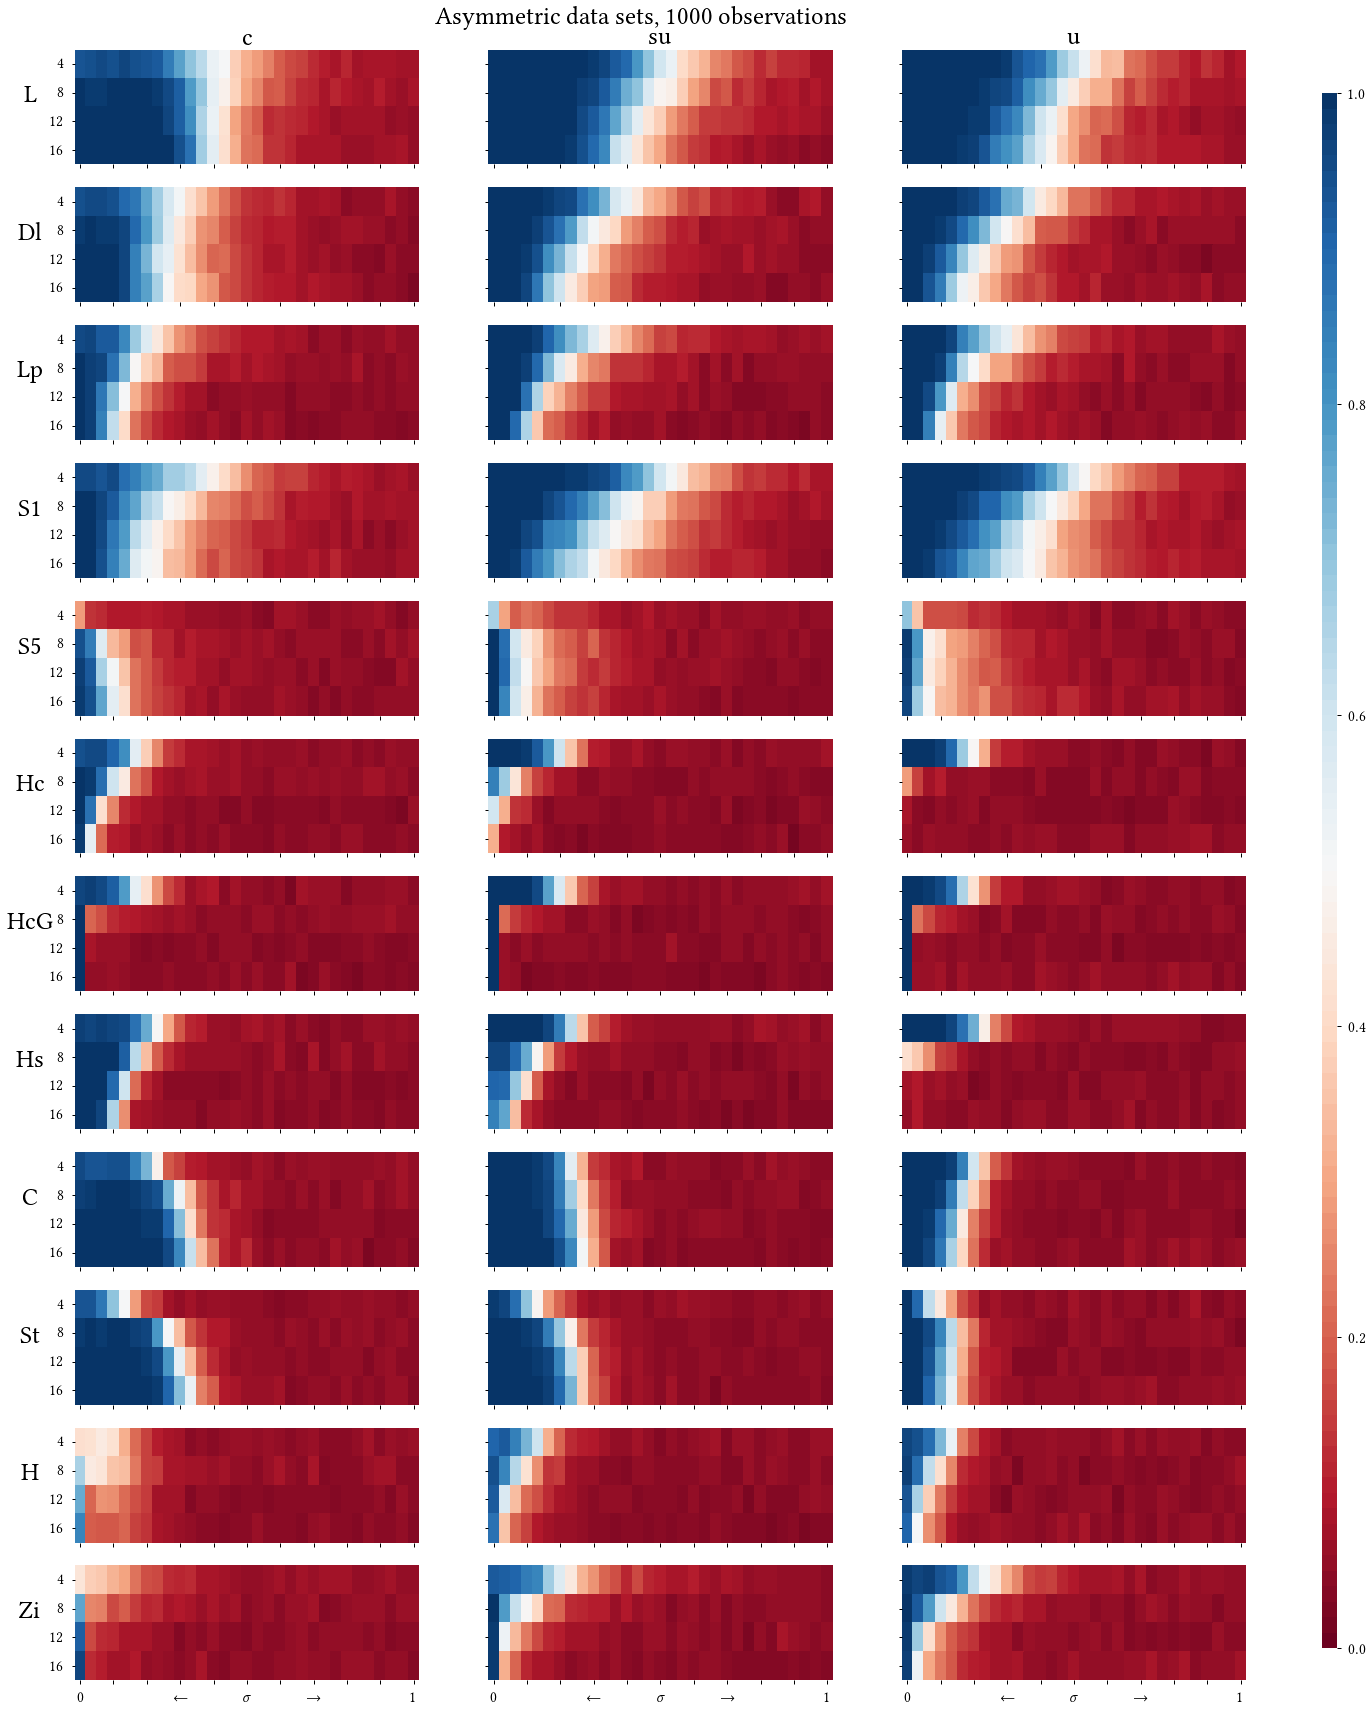

In [ ]:
power_plot(master_1000_asy, "slice_technique", "power95", "Asymmetric data sets, 1000 observations")

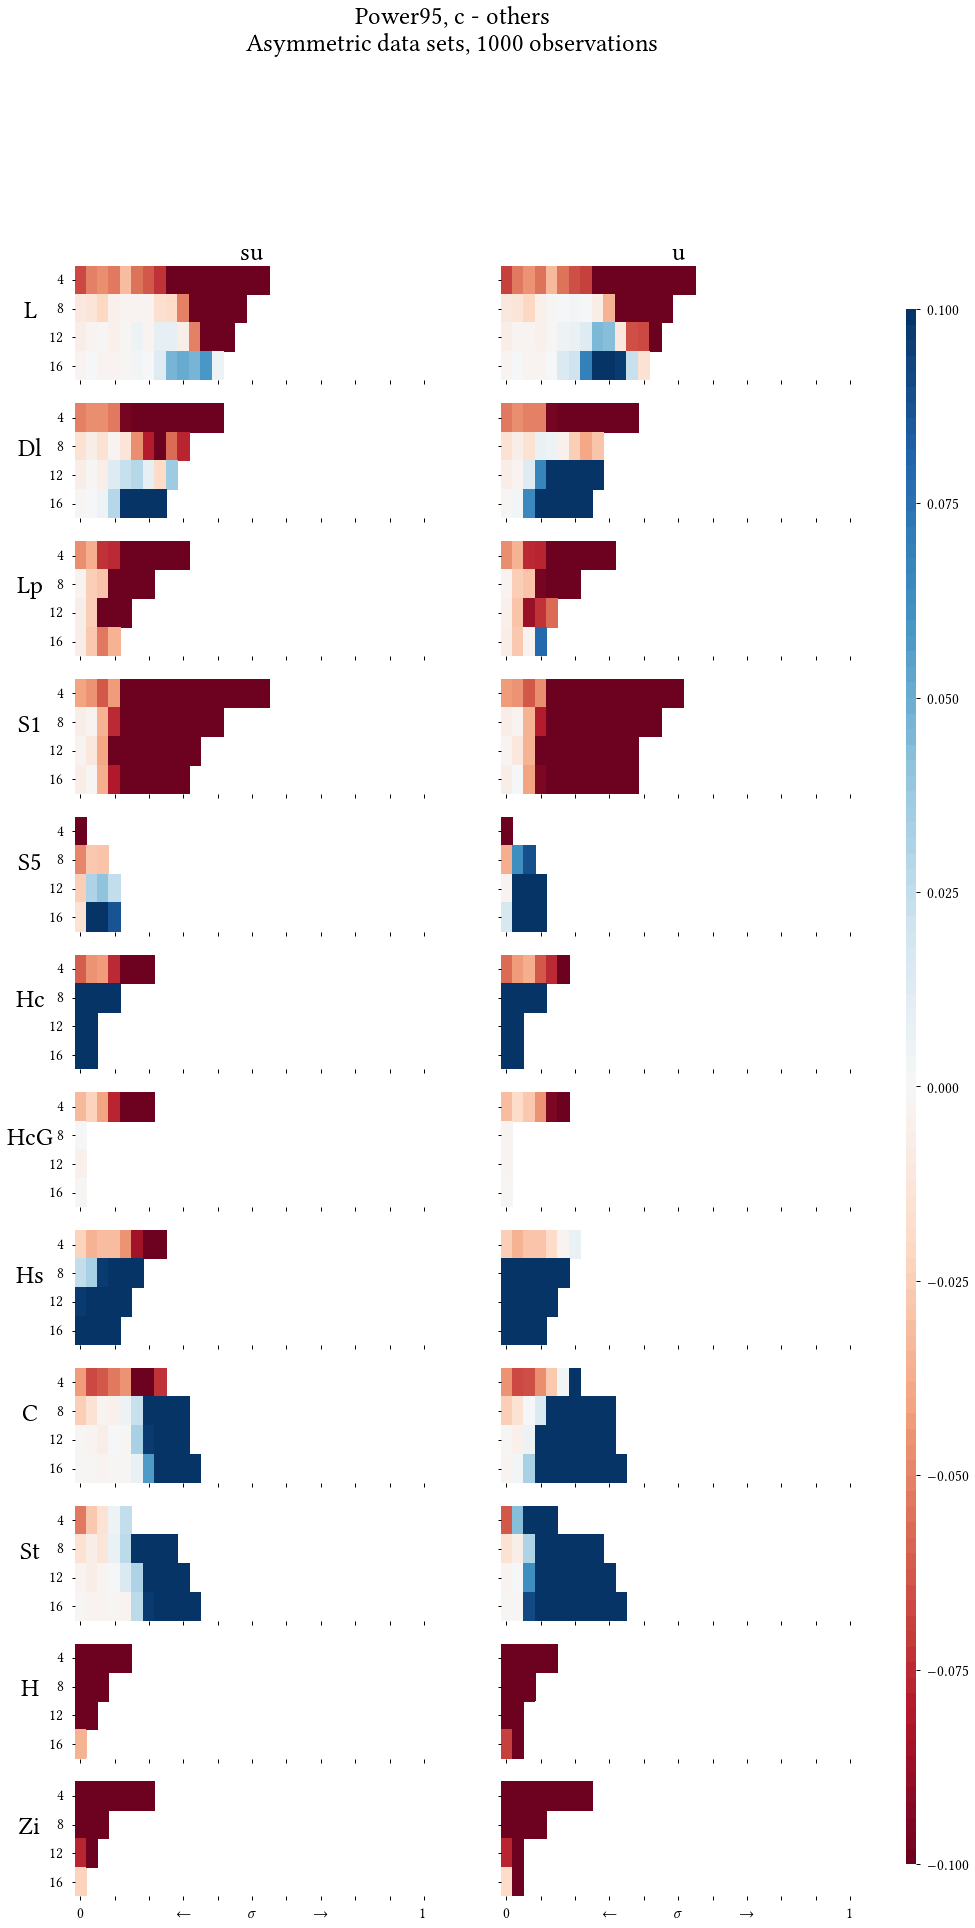

In [ ]:
power95_compare(master_1000_asy, "c", ["su", "u"], "slice_technique", "Asymmetric data sets, 1000 observations")

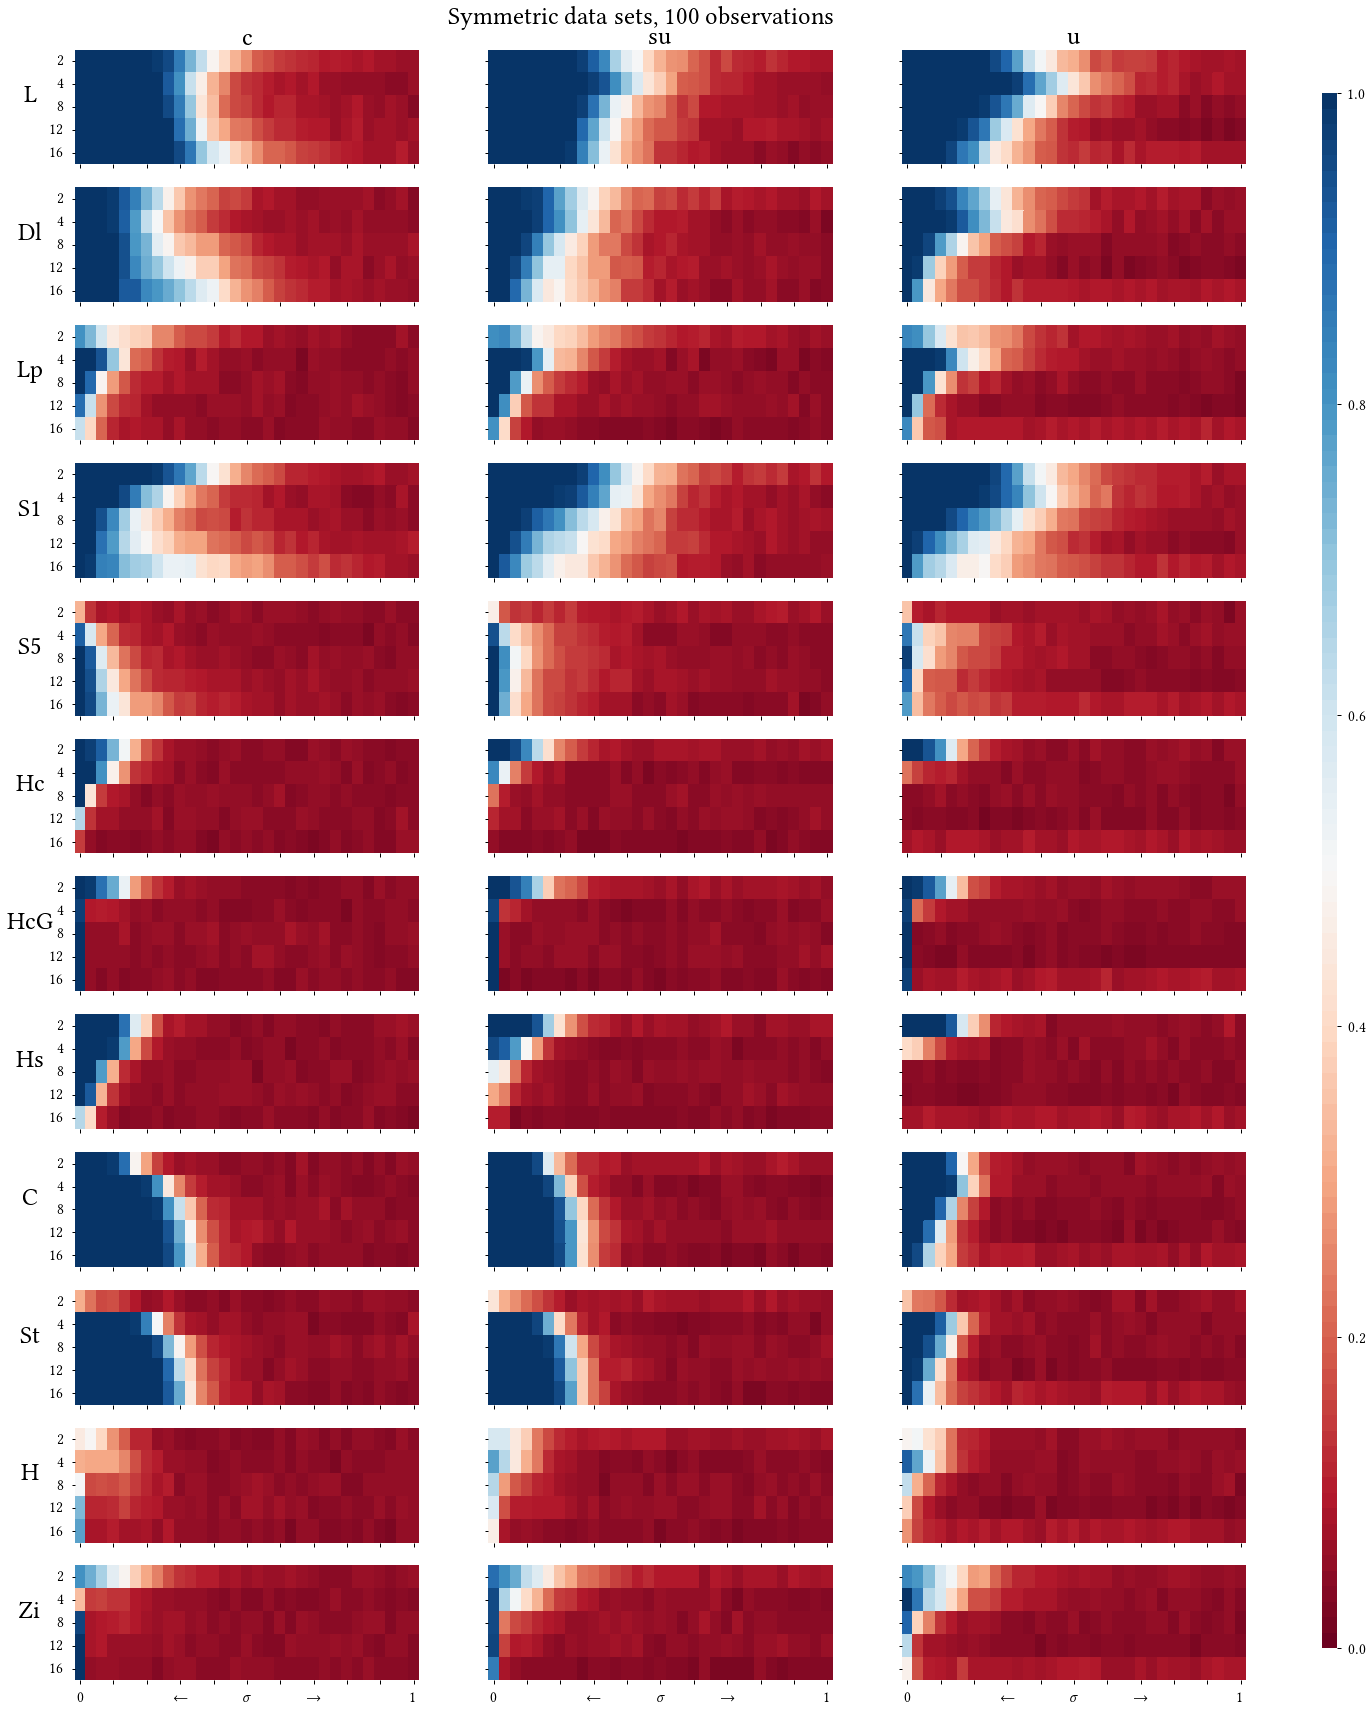

In [ ]:
power_plot(master_100_sy, "slice_technique", "power95", "Symmetric data sets, 100 observations")

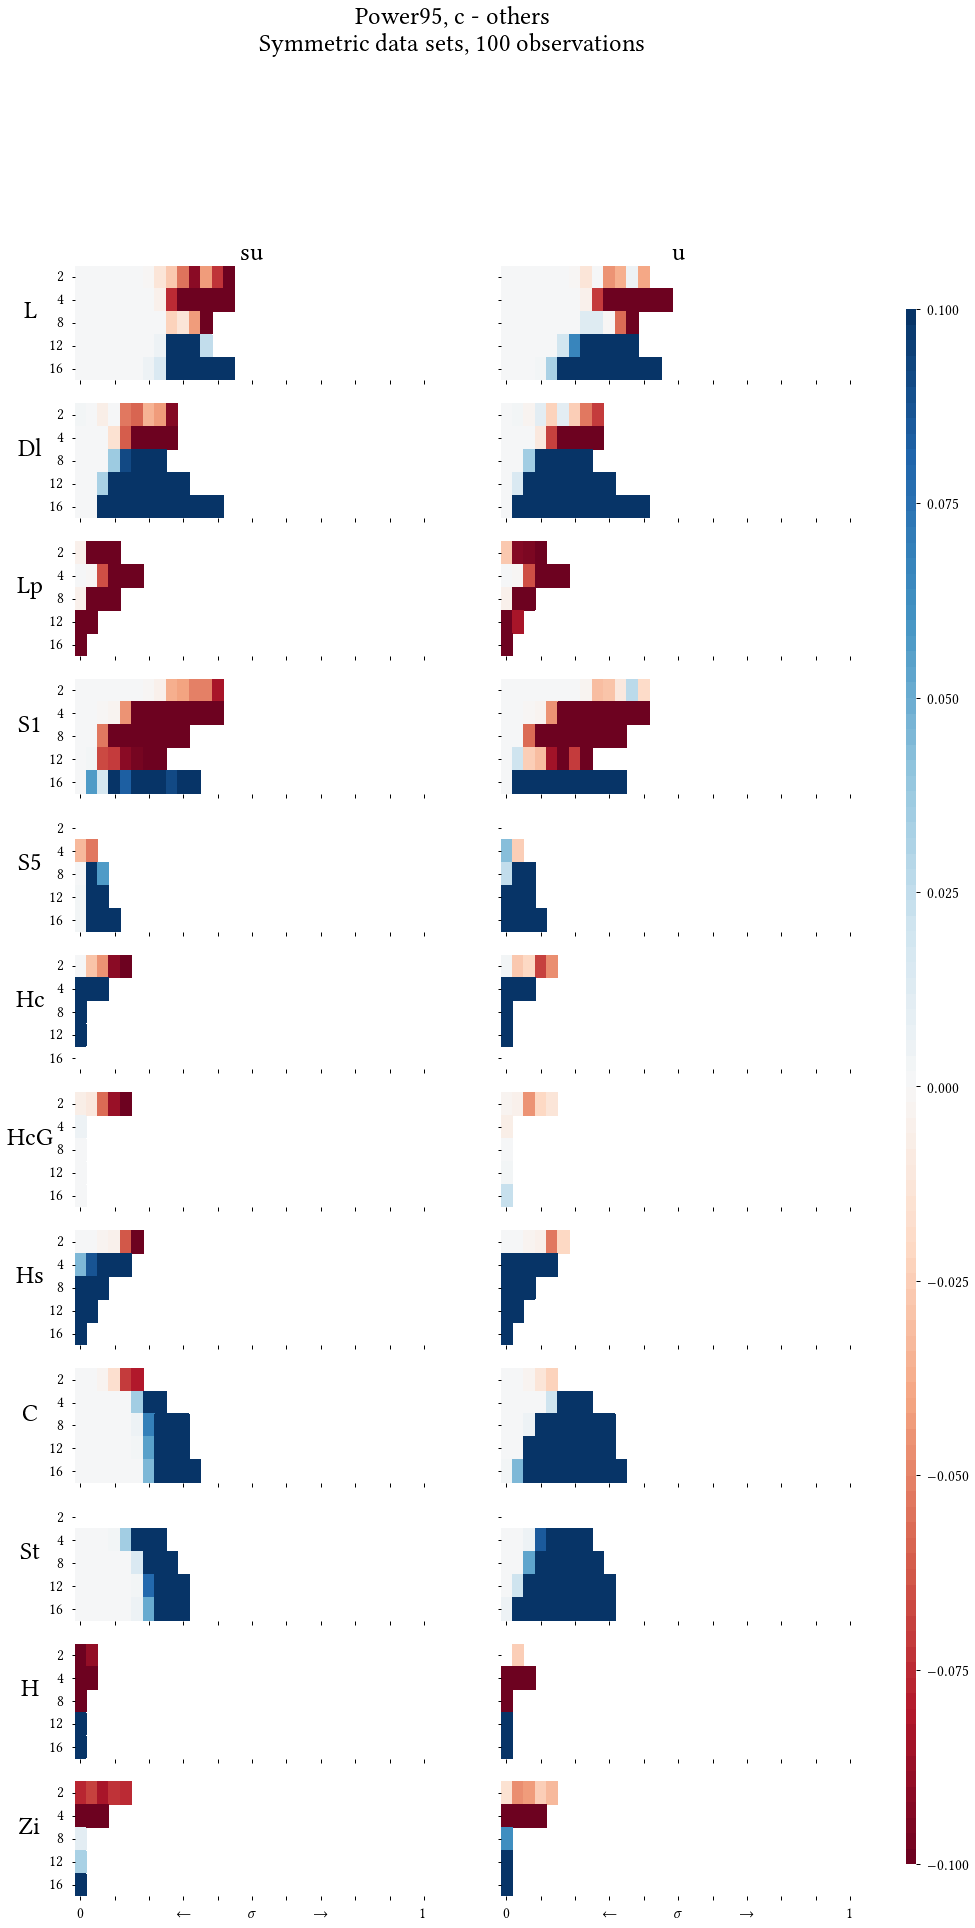

In [ ]:
power95_compare(master_100_sy, "c", ["su", "u"], "slice_technique", "Symmetric data sets, 100 observations")

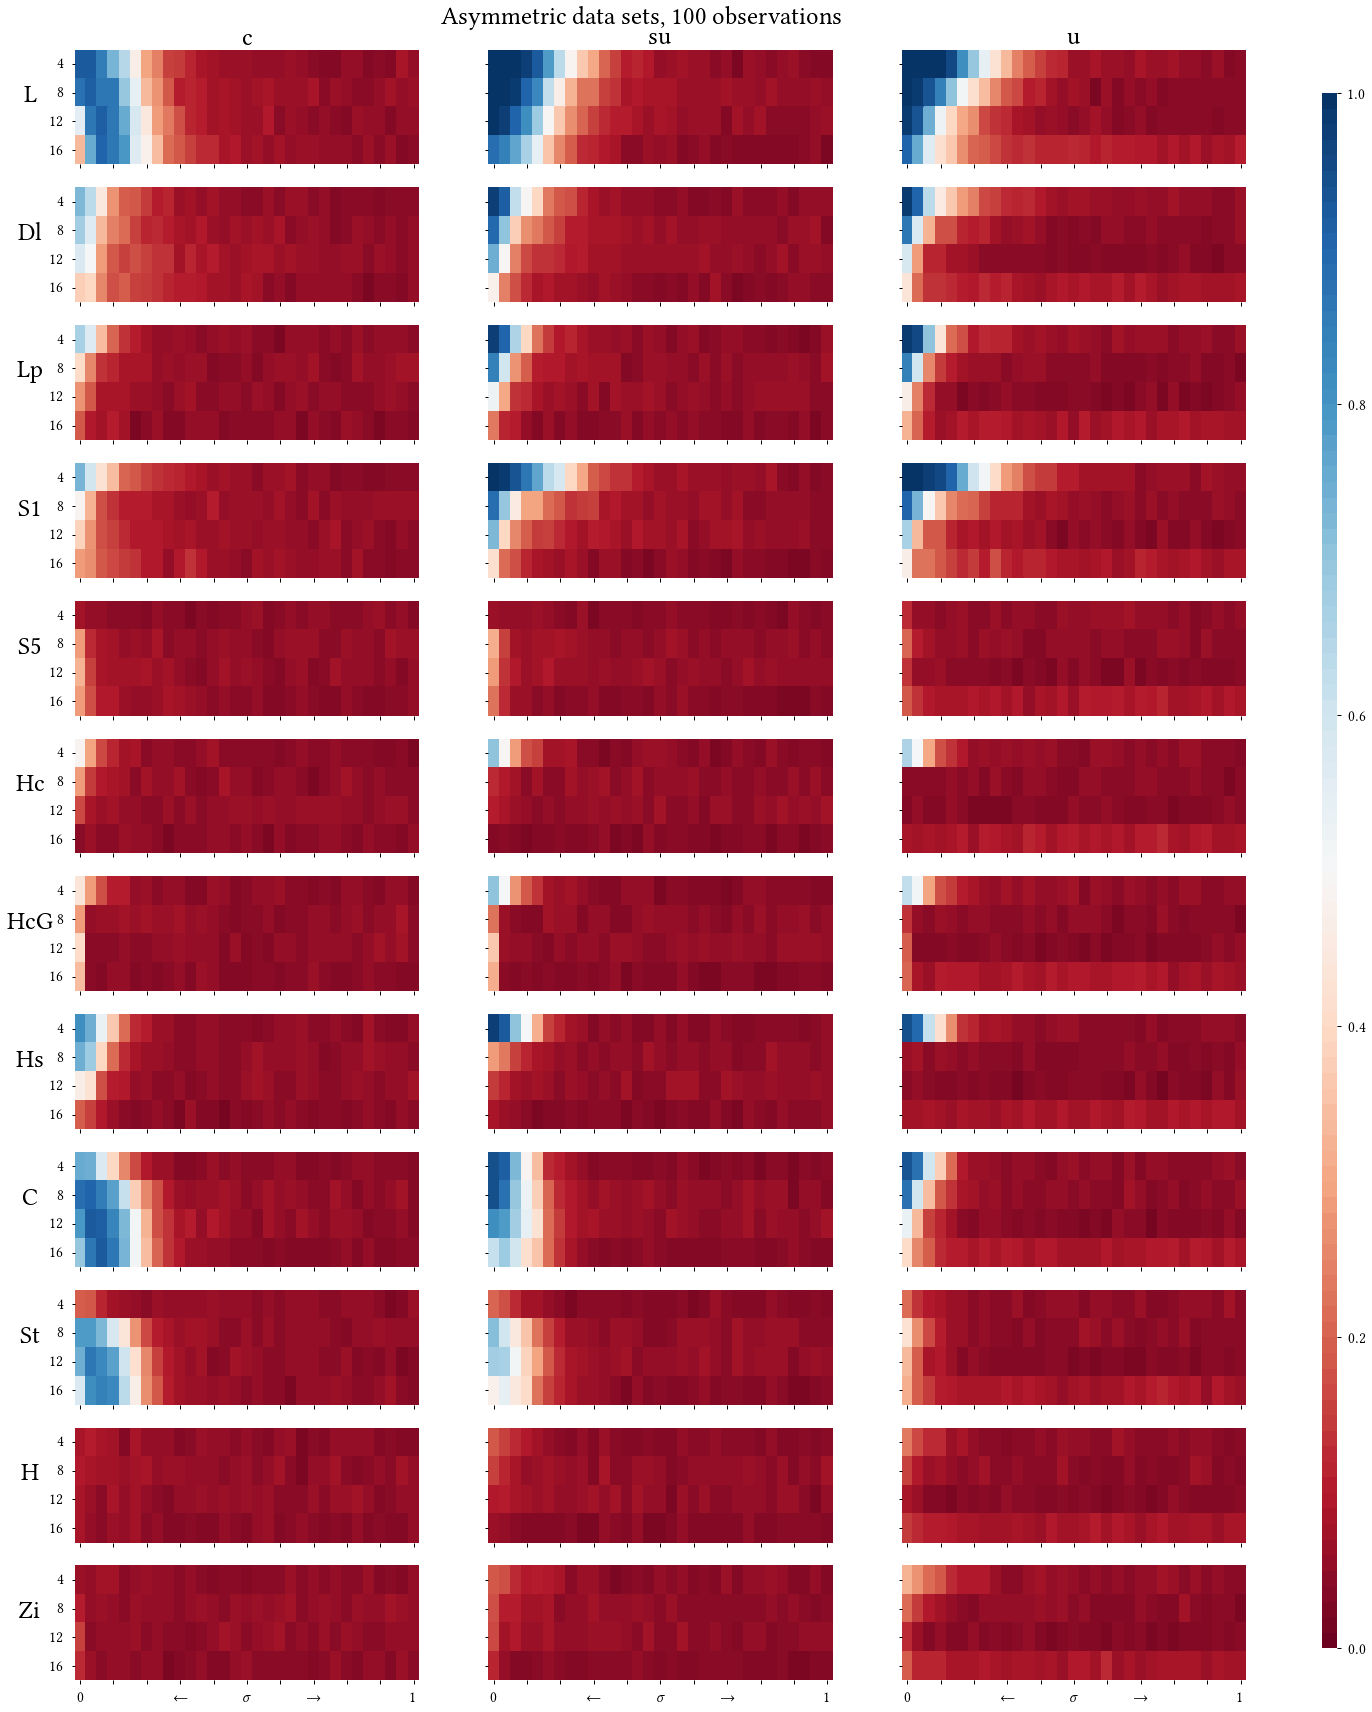

In [ ]:
power_plot(master_100_asy, "slice_technique", "power95", "Asymmetric data sets, 100 observations")

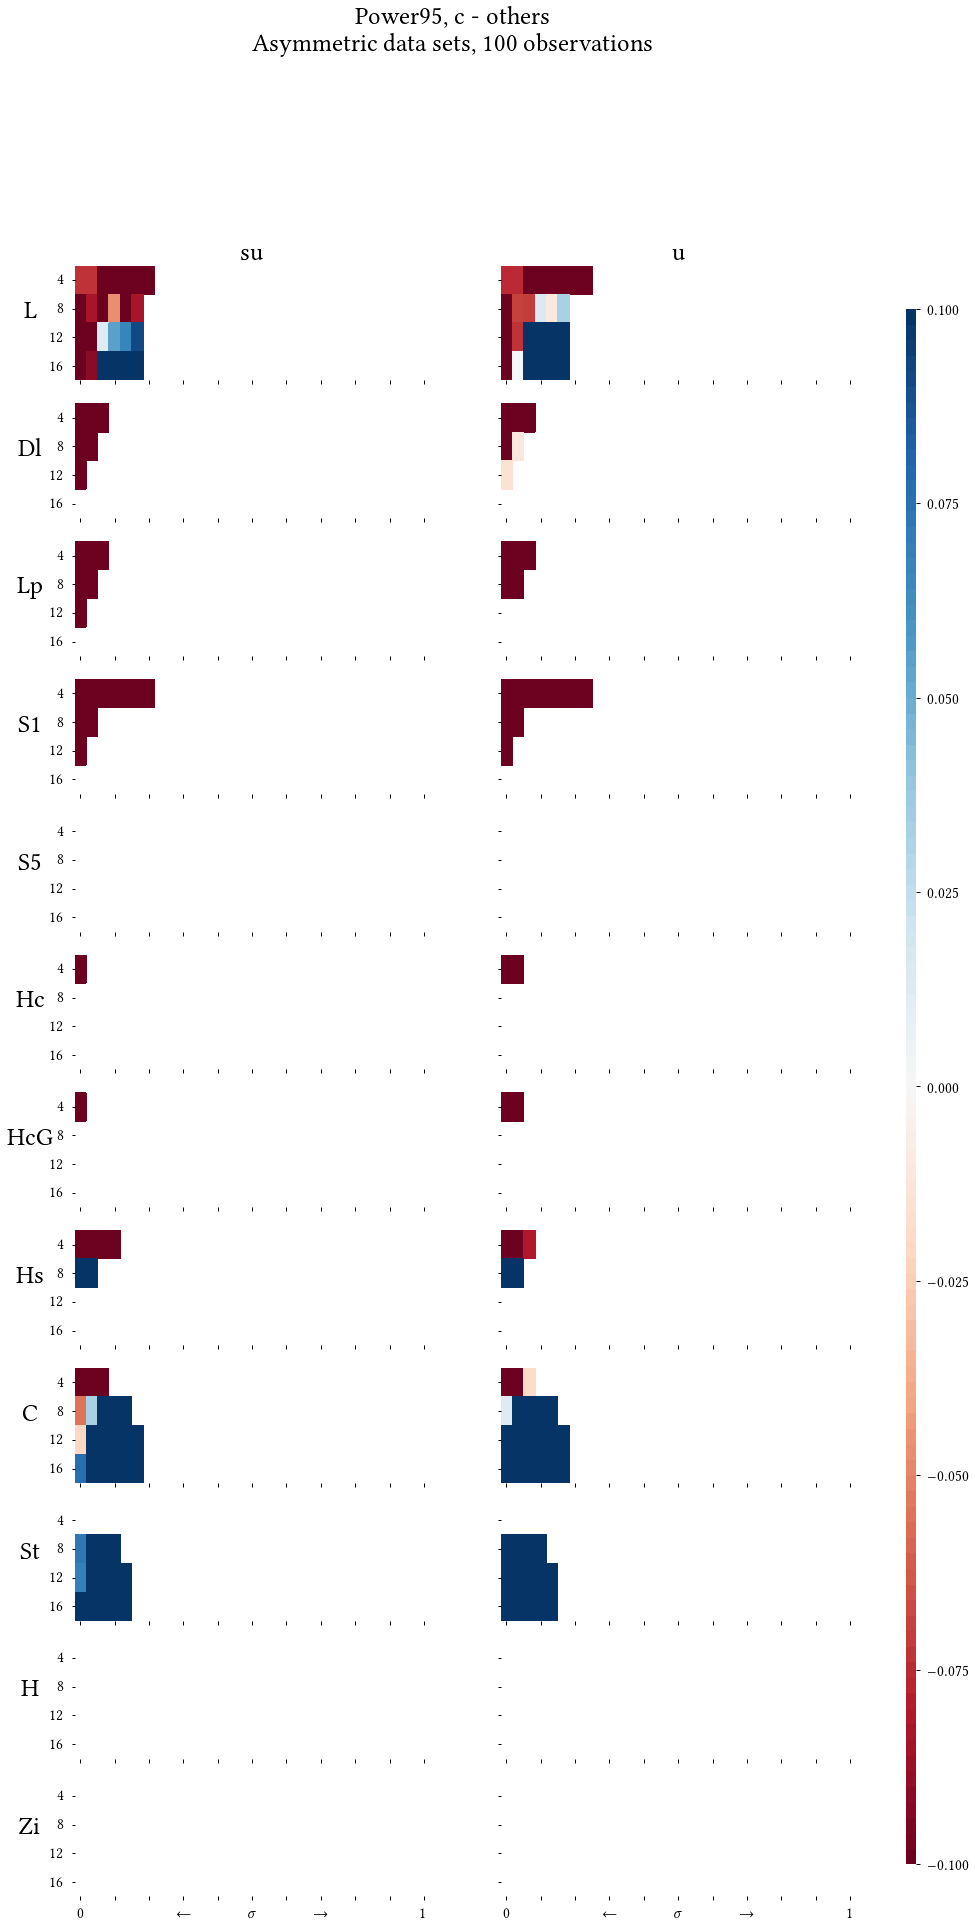

In [ ]:
power95_compare(master_100_asy, "c", ["su", "u"], "slice_technique", "Asymmetric data sets, 100 observations")